# Problem Statement

-  Based on the given features predict whether a person will have diabetes or not

# Outline

- 1. Import Libraries
- 2. Load Data
- 3. Basic checks
- 4. Exploratory Data Analysis
- 5. Data Preprocessing
- 6. Predictive Model Creation Using Logistic Regression Algorithm
- 7. Evaluating the model
- 9. Conclusion

# Domain Analysis

# 1. Import Libraries

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# 2. Load Data

In [3]:
# loading the data
data = pd.read_csv("diabetes1.csv")

# 3. Basic checks

In [4]:
pd.set_option('display.max_rows',None)

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- No missing values in the data


In [8]:
# exploring the statistical features of the dataset
data.describe().T.style.background_gradient(cmap = 'Set2', low = 0.4, high = 0.1, axis=0)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


- From the statistical features, it can be seen that Glucose, BloodPressure, SkinThickness and Insulin have zero values which is not possible. This is termed as data corruption

# 4. Exploratory Data Analysis

### 4.1 Univariate Analysis

In [9]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Pregnancies', ylabel='count'>

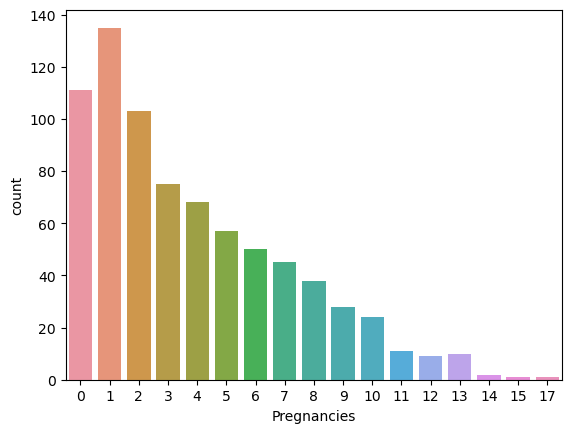

In [9]:
# Analysing Pregnancies
sns.countplot(x = 'Pregnancies', data = data)

- it can be inferred from the above graph that maximum patients conceived 1 and 0 times

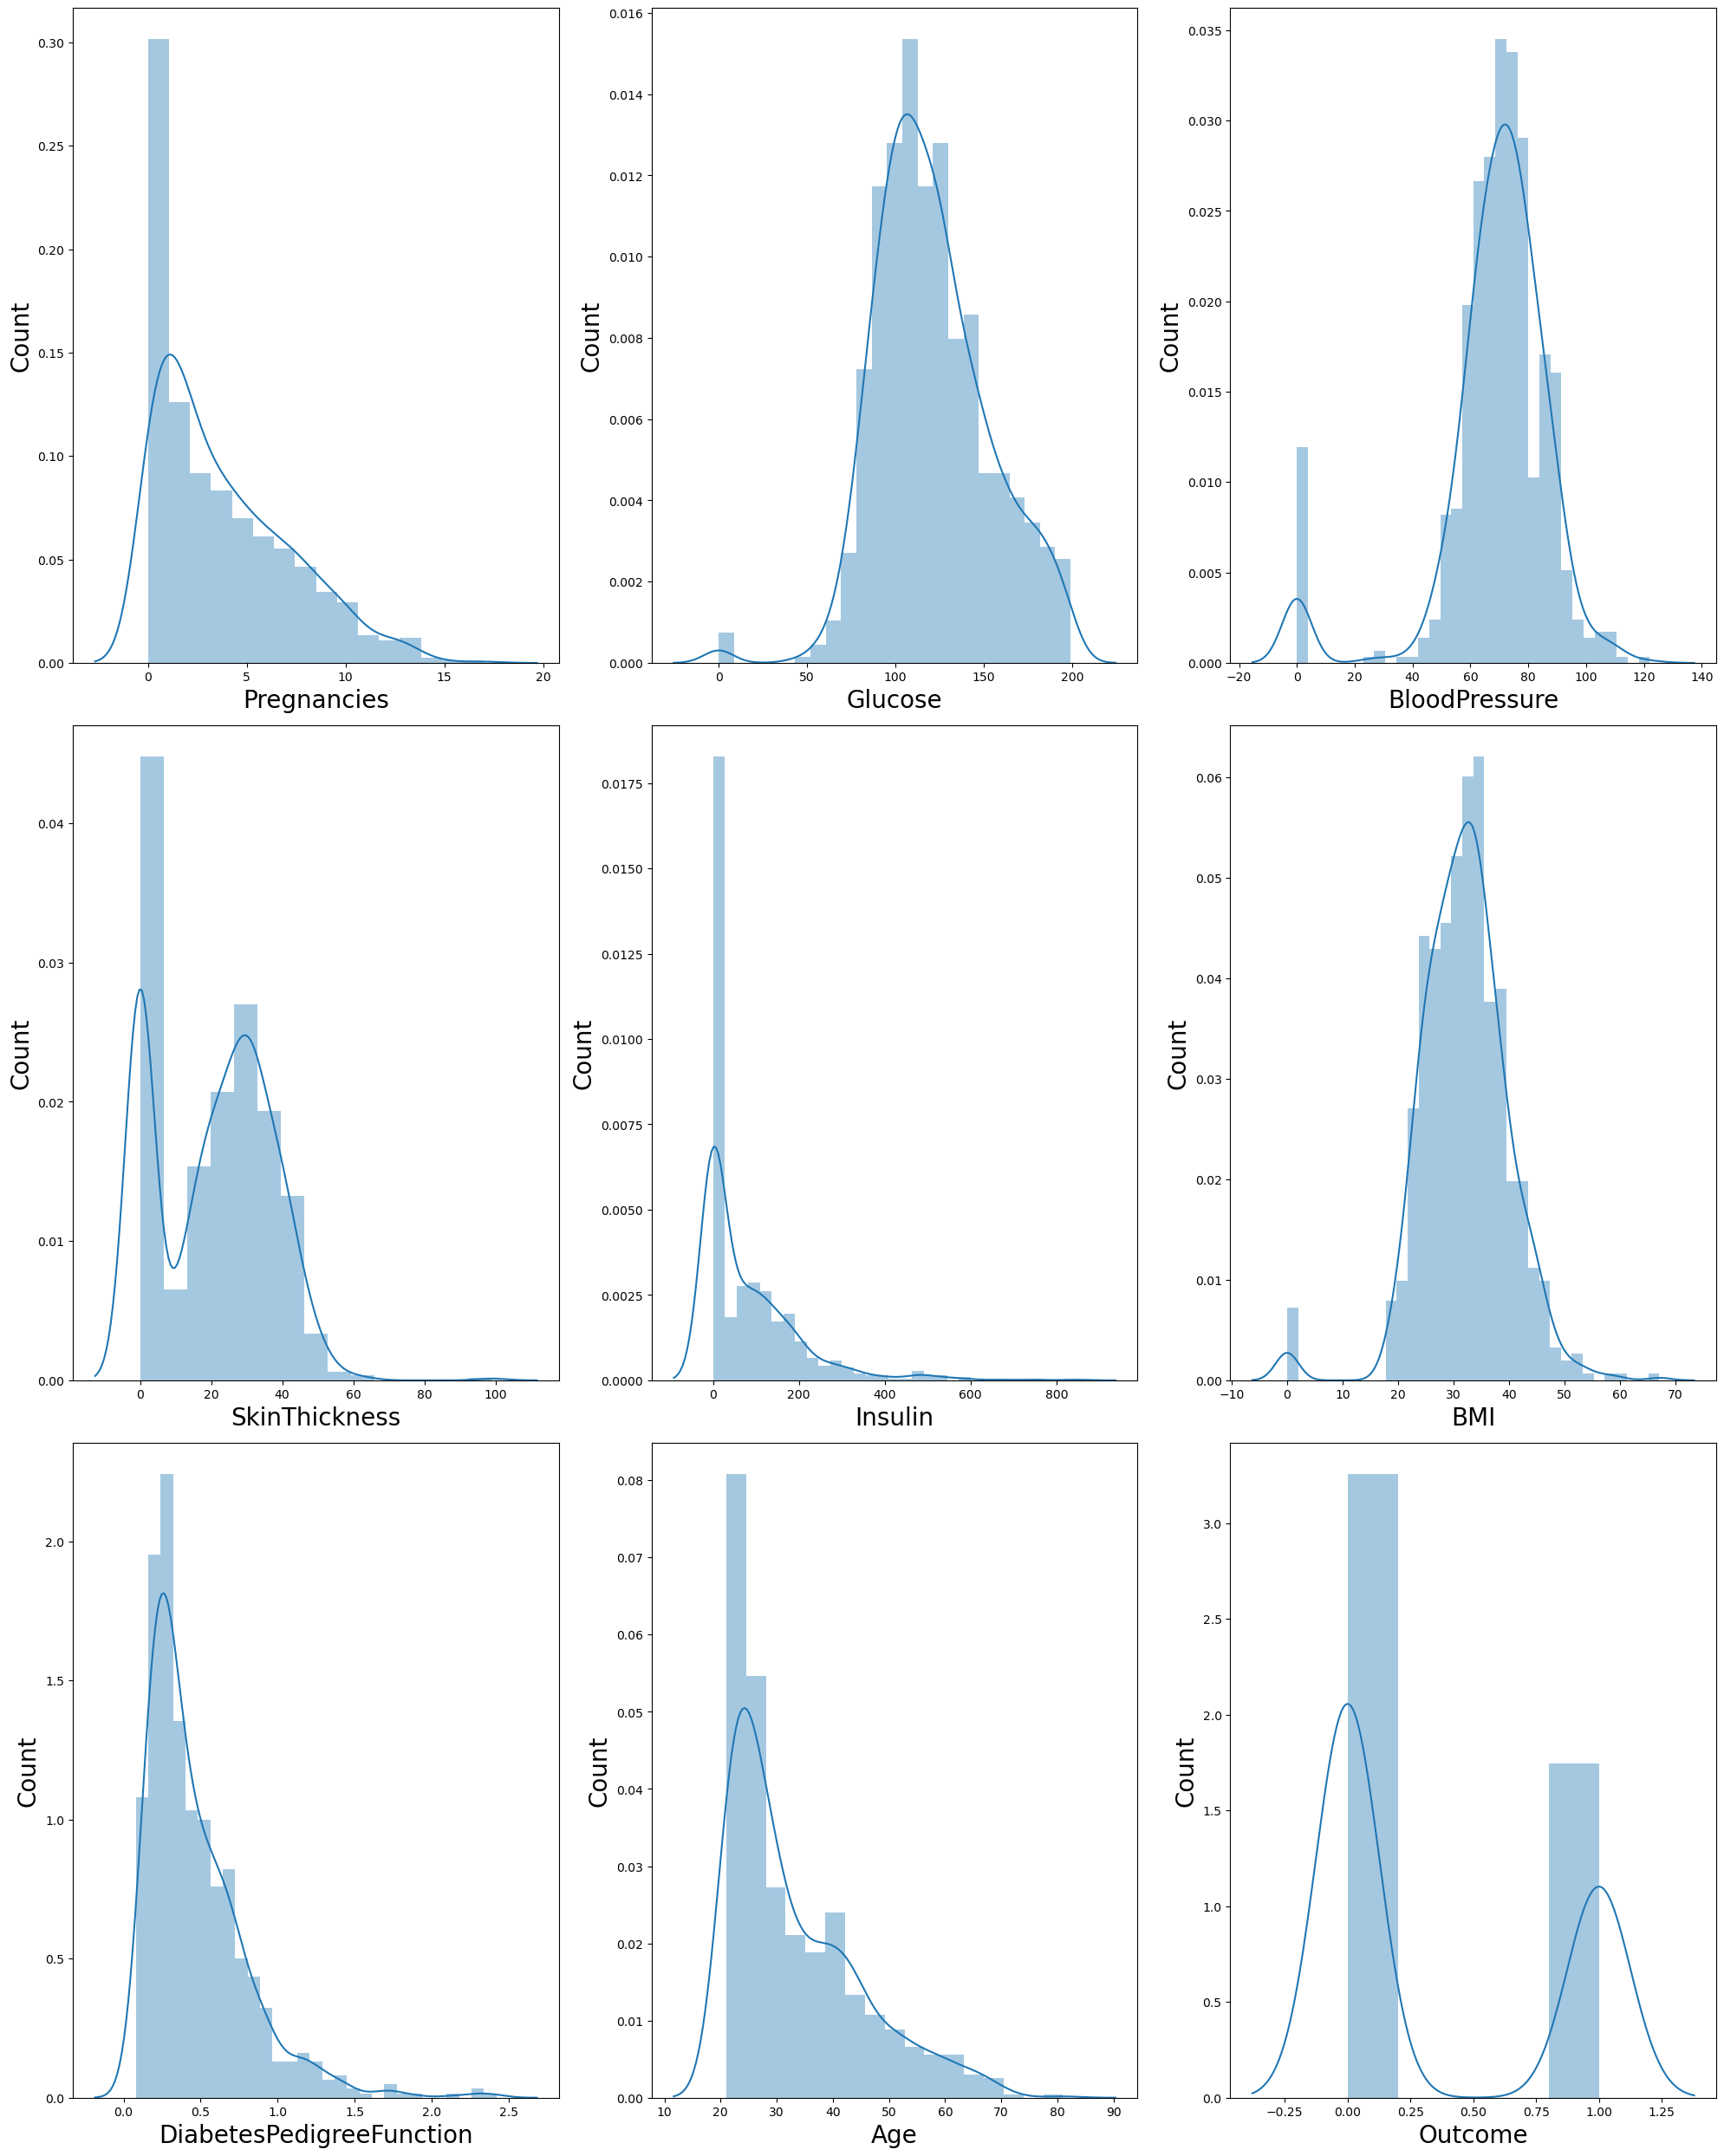

In [10]:
# distplot to show the distribution of the features

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.ylabel('Count', fontsize = 20)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### 4.2 Bivariate Analysis

<Axes: xlabel='Pregnancies', ylabel='count'>

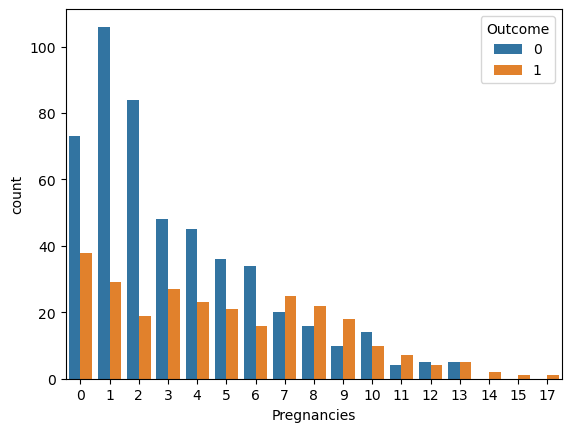

In [11]:
# Analyzing how pregnancies impact the patient with diabetes
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = data)

- From the above graph, it can be inferred that, as the number of pregnancies increases, chances of getting diabetes also increases
- All women who got pregnant from 13 to 17 times are diabetic

<Axes: xlabel='Glucose', ylabel='Count'>

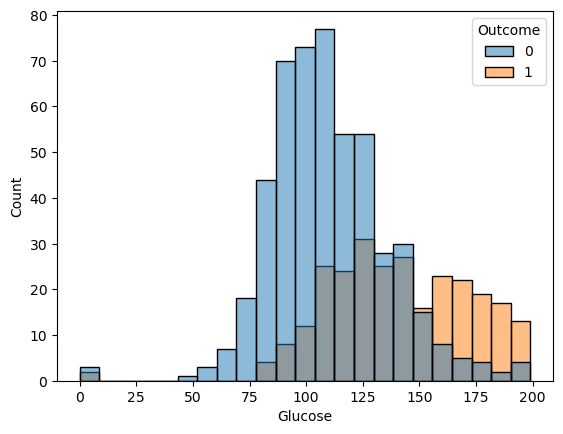

In [12]:
# Analyzing the relationship between diabetes and glucose
sns.histplot(x = 'Glucose', hue = 'Outcome', data=data)

- from the above graph, we can infer that a person having glucose range from 0 to 100 can be ocnsidered as having lesser chance of getting diabetes. 
- a person having glucose range between 100 to 150 is equally at risk and no risk and we need to analyze more features of the patient.
- if a person has glucose more than 150, higher is the chance of getting diabetes

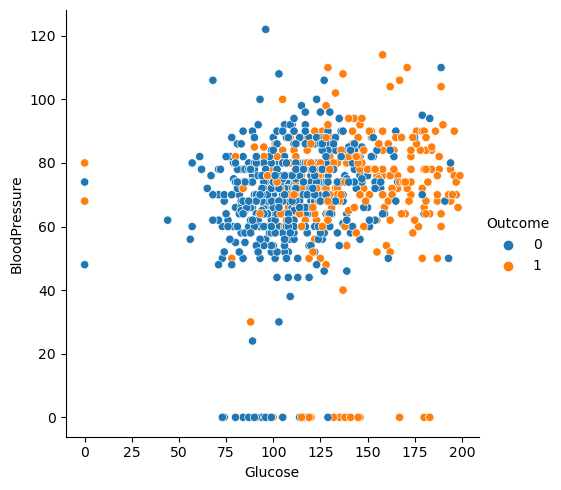

In [13]:
## Analyze Glucose with BloodPressure
sns.relplot(x='Glucose', y = 'BloodPressure', hue = 'Outcome', data = data)
plt.show()

- From the above graph, when Glucose is increased to certain level, where even if the BP is normal, the person is diabetic

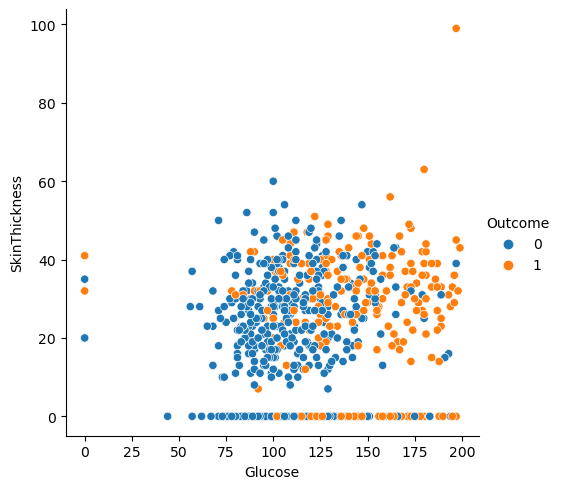

In [14]:
# Analyze Glucose with SkinThickness
sns.relplot(x = 'Glucose', y = 'SkinThickness', hue  = 'Outcome', data = data)
plt.show()

- From the above graph, there seem to be no defined relationship between Glucose and SkinThickness as far as diabetes is concerned. 

<Axes: xlabel='BloodPressure', ylabel='Count'>

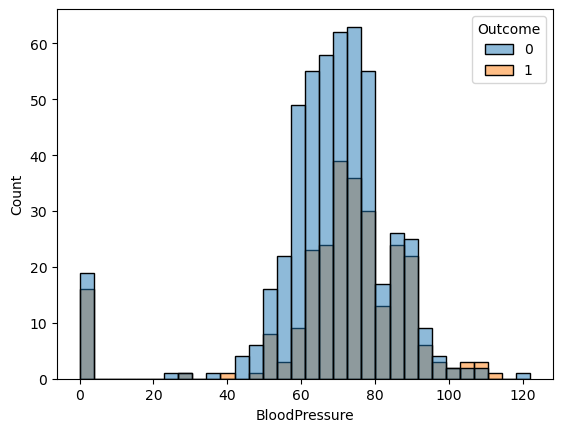

In [15]:
# Analyze relationship between BloodPressure and Outcome
sns.histplot(x = 'BloodPressure', hue = 'Outcome', data = data)

- No specific relationship found

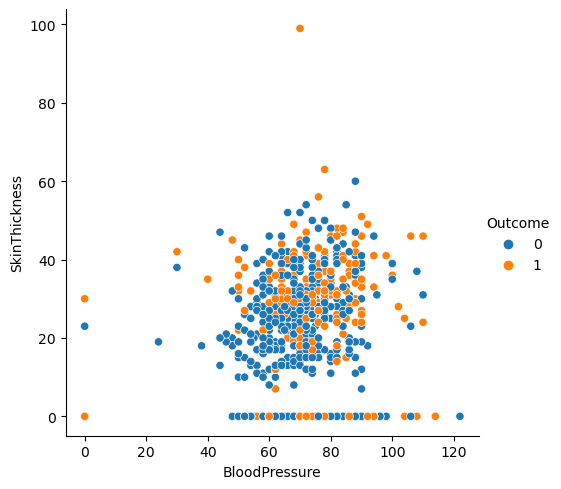

In [16]:
# Analyze BloodPressure with SkinThickness
sns.relplot(x = 'BloodPressure', y = 'SkinThickness', hue = 'Outcome', data = data)
plt.show()

- No specific relationship found

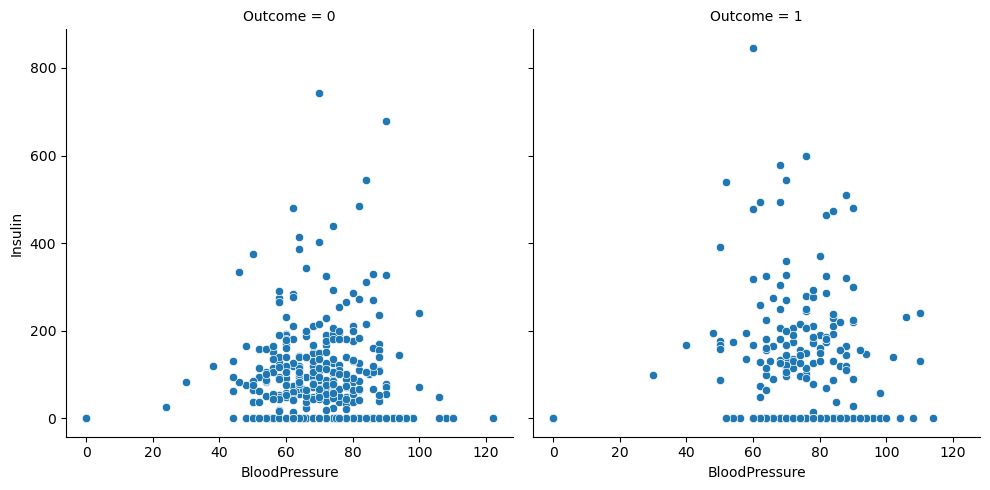

In [17]:
# analyze BloodPressure with Insulin
sns.relplot(x = 'BloodPressure', y = 'Insulin', col = 'Outcome', data = data)
plt.show()

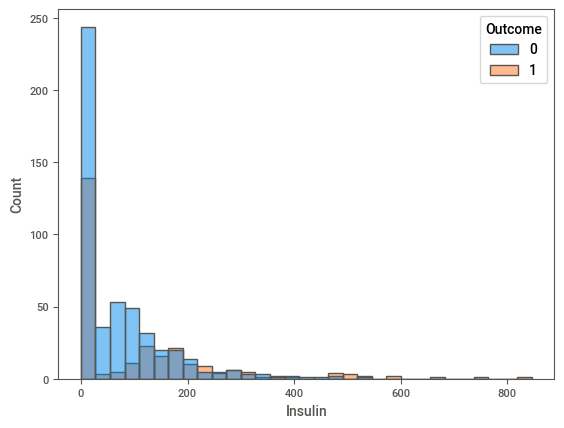

In [21]:
# Analyzing Insulin with Outcome
sns.histplot(x = 'Insulin', hue = 'Outcome', data = data)
plt.show()

- From the above graph it can be inferred that if a person has Insulin level from 0 till 100, most likely he will be non diabetic, however when insulin level increases, people are at high risk of getting diabetic.

# 5. Data Preprocessing

### 5.1 Finding missing values

In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- there are no missing values in the dataset

### 5.2 Handling the corrupted data

 - Some data points in Glucose, BloodPressure, SkinThickness, Insulin, and BMI have been erroneously recorded as zero, which should not be the case. To address this issue, we substitute these zero values with either the mean or median, depending on the distribution.

### a. Glucose
- Based on the distribution chart provided above, Glucose closely follows a normal distribution. Consequently, we intend to substitute the zero values with the mean.

In [9]:
# getting the rows where the datapoints are zero in Glucose
data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [4]:
# replacing the zero values with the mean
data.Glucose.replace(0,np.mean(data.Glucose), inplace  = True)

### b.BloodPressure
-  Based on the distribution chart provided above, BloodPressure closely follows a normal distribution. Consequently, we intend to substitute the zero values with the mean.

In [11]:
# getting the rows where the datapoints are zero in BloodPressure
data.loc[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [5]:
# replacing the zero values with mean
data.BloodPressure.replace(0,np.mean(data.BloodPressure), inplace = True)

### c. SkinThickness
- Based on the distribution plot depicted above, SkinThickness exhibits a certain degree of skewness and deviates from a normal distribution. Therefore, our approach is to replace the zero values with the median.

In [13]:
# getting the rows where values in SkinThickness are zero
data.loc[data['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.000000,0,0,23.3,0.672,32,1
5,5,116.0,74.000000,0,0,25.6,0.201,30,0
7,10,115.0,69.105469,0,0,35.3,0.134,29,0
9,8,125.0,96.000000,0,0,0.0,0.232,54,1
10,4,110.0,92.000000,0,0,37.6,0.191,30,0
11,10,168.0,74.000000,0,0,38.0,0.537,34,1
12,10,139.0,80.000000,0,0,27.1,1.441,57,0
15,7,100.0,69.105469,0,0,30.0,0.484,32,1
17,7,107.0,74.000000,0,0,29.6,0.254,31,1
21,8,99.0,84.000000,0,0,35.4,0.388,50,0


In [6]:
# replacing zero values with median
data.SkinThickness.replace(0,np.median(data.SkinThickness), inplace = True)

### d. Insulin
- Based on the distribution plot depicted above, Insulin exhibits a certain degree of skewness and deviates from a normal distribution. Therefore, our approach is to replace the zero values with the median.

In [15]:
# getting the rows where values in Insulin are zero
data.loc[data['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35,0,33.6,0.627,50,1
1,1,85.000000,66.000000,29,0,26.6,0.351,31,0
2,8,183.000000,64.000000,23,0,23.3,0.672,32,1
5,5,116.000000,74.000000,23,0,25.6,0.201,30,0
7,10,115.000000,69.105469,23,0,35.3,0.134,29,0
9,8,125.000000,96.000000,23,0,0.0,0.232,54,1
10,4,110.000000,92.000000,23,0,37.6,0.191,30,0
11,10,168.000000,74.000000,23,0,38.0,0.537,34,1
12,10,139.000000,80.000000,23,0,27.1,1.441,57,0
15,7,100.000000,69.105469,23,0,30.0,0.484,32,1


In [7]:
# replacing the zero values with median
data.Insulin.replace(0, np.median(data.Insulin), inplace = True)

### e. BMI
 Based on the distribution chart provided above, BMI closely follows a normal distribution. Consequently, we intend to substitute the zero values with the mean.

In [17]:
# getting the values where data points in BMI are zero
data.loc[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,23,30.5,0.0,0.232,54,1
49,7,105.0,69.105469,23,30.5,0.0,0.305,24,0
60,2,84.0,69.105469,23,30.5,0.0,0.304,21,0
81,2,74.0,69.105469,23,30.5,0.0,0.102,22,0
145,0,102.0,75.000000,23,30.5,0.0,0.572,21,0
371,0,118.0,64.000000,23,89.0,0.0,1.731,21,0
426,0,94.0,69.105469,23,30.5,0.0,0.256,25,0
494,3,80.0,69.105469,23,30.5,0.0,0.174,22,0
522,6,114.0,69.105469,23,30.5,0.0,0.189,26,0
684,5,136.0,82.000000,23,30.5,0.0,0.640,69,0


In [8]:
# replacing the zero values with mean
data.BMI.replace(0, np.mean(data.BMI), inplace = True)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 5.3 Checking for Outliers

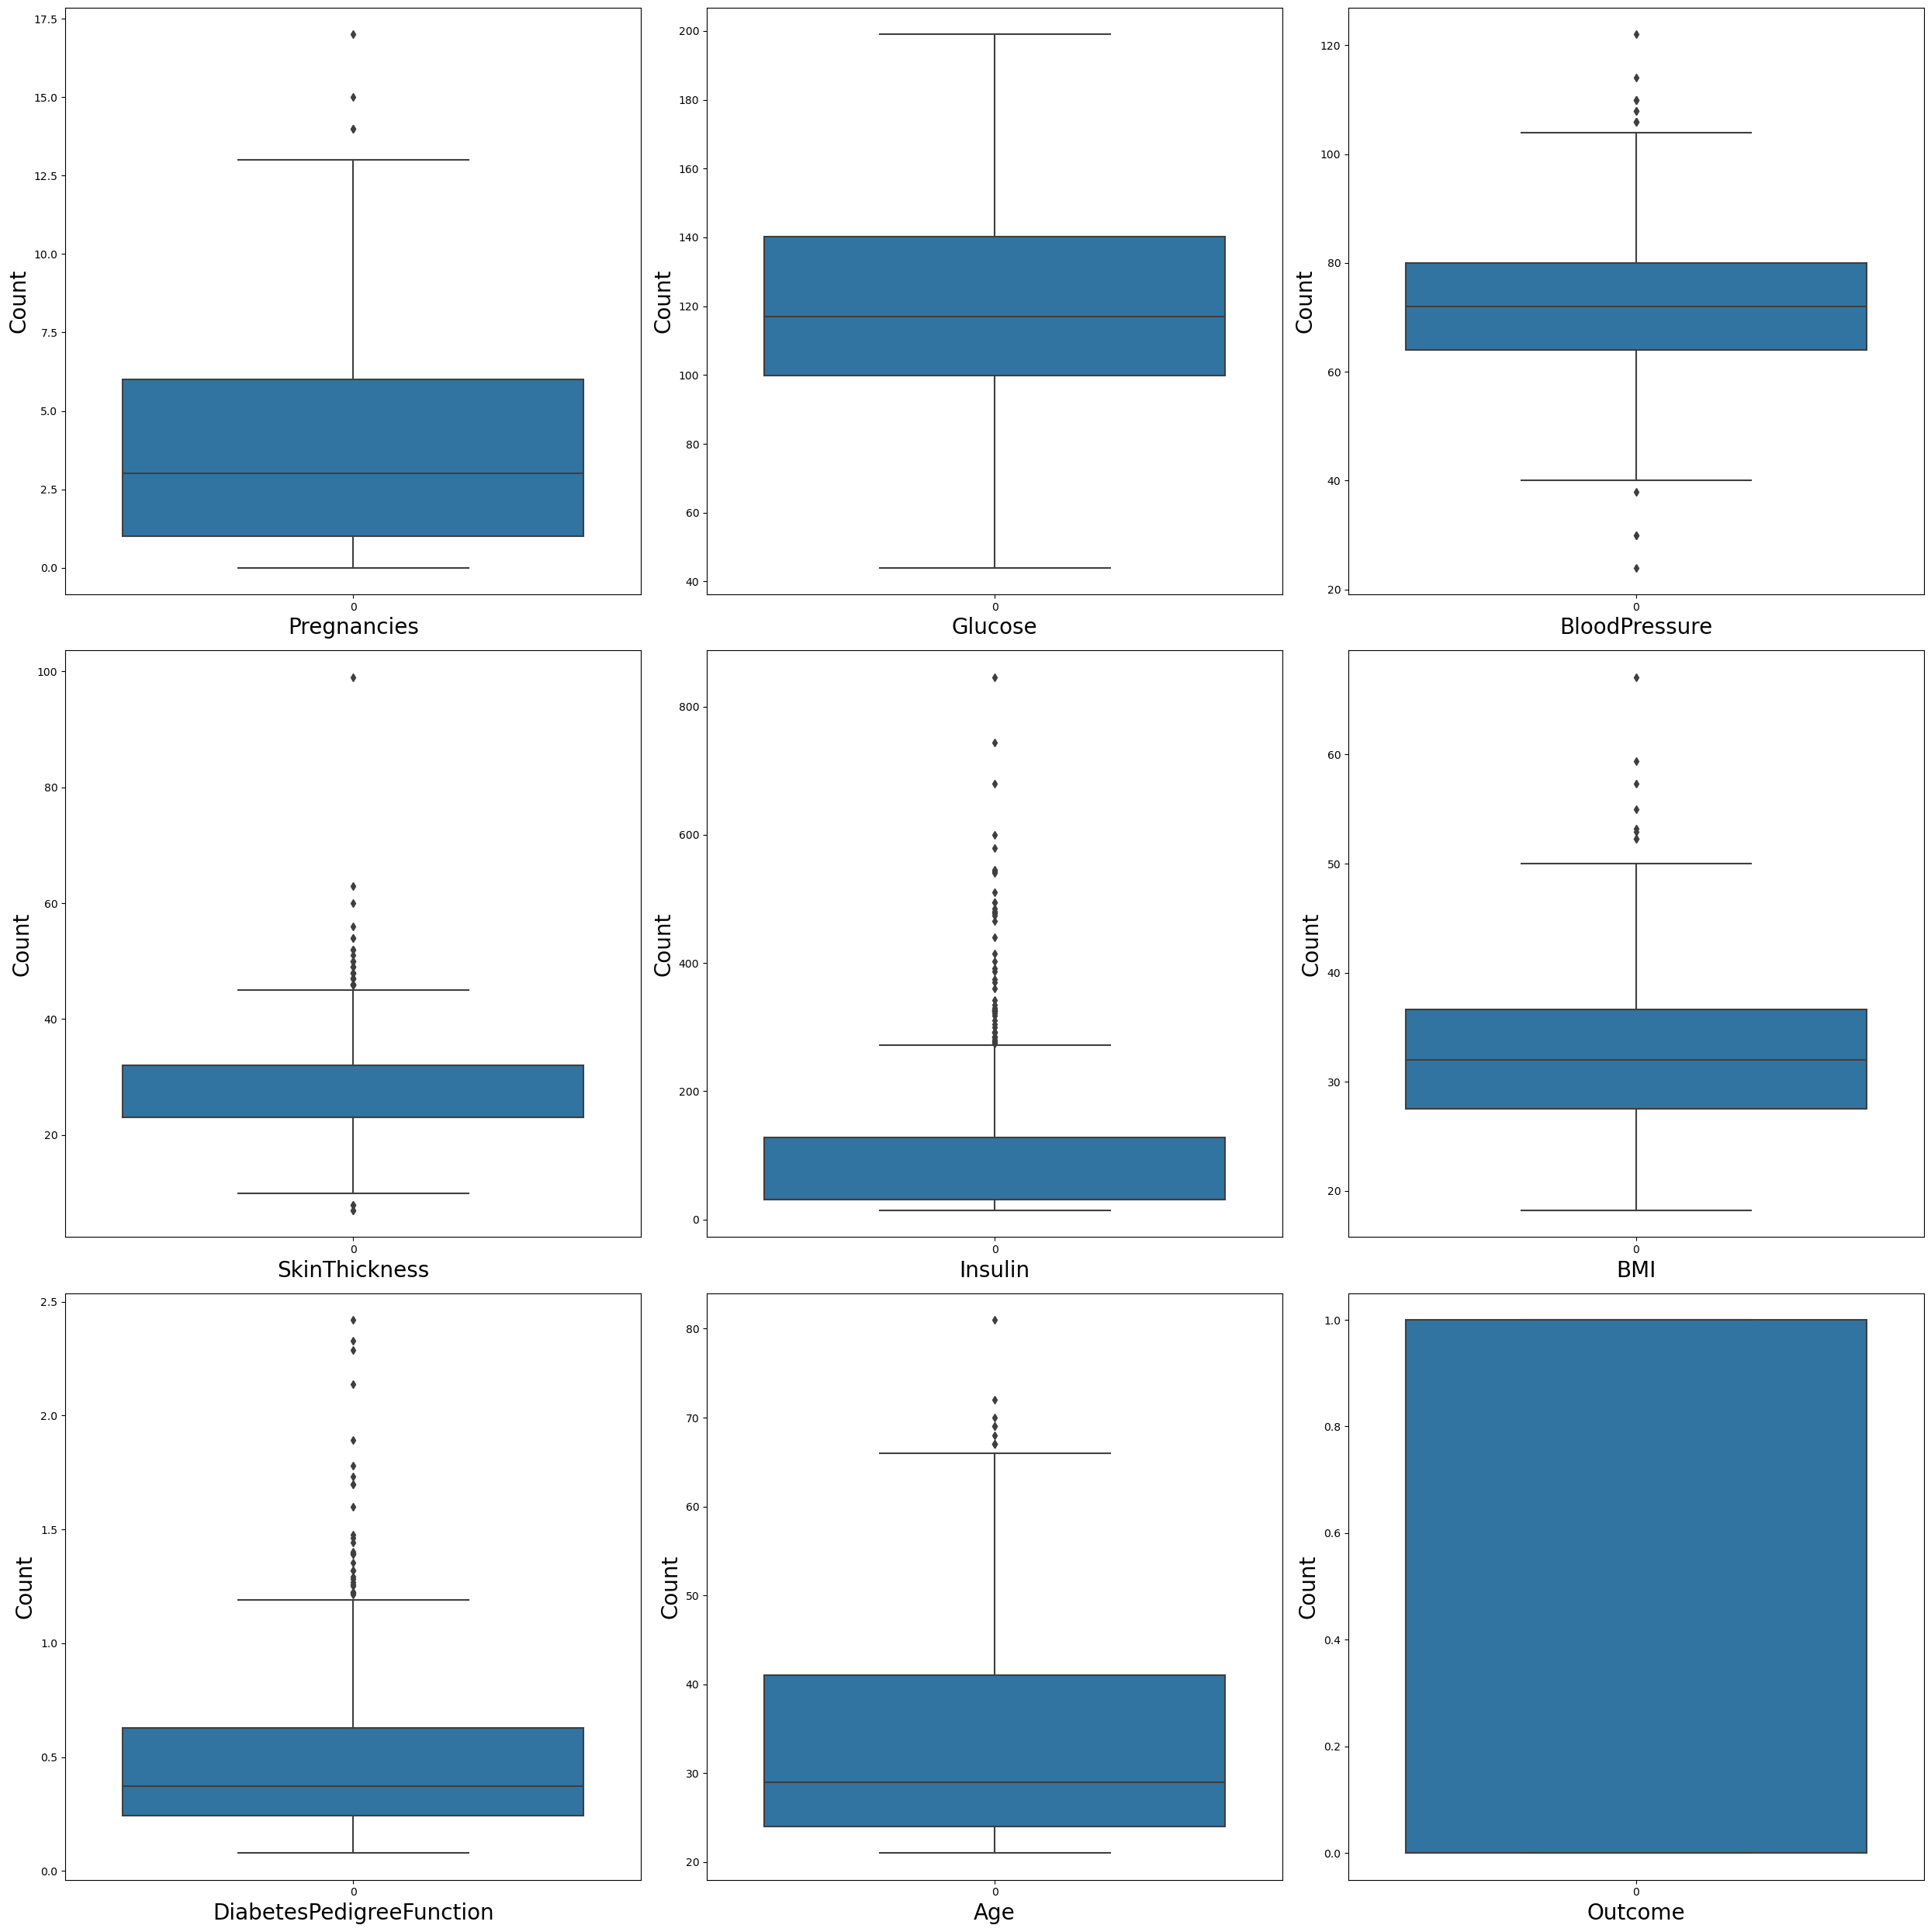

In [20]:
plt.figure(figsize = (25,25))
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Count',fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From the above boxplot we can see that there are outliers in some of the features. It is important to impute these outliers because:  
1. **Data Quality and Integrity:**
   - Outliers can significantly distort the statistical measures of central tendency (mean, median) and dispersion (standard deviation, variance). Imputing outliers helps in obtaining more accurate and representative summary statistics, ensuring the integrity of the data.

2. **Preserving Relationships:**
   - Outliers can disrupt the relationships and patterns present in the data. Imputing outliers helps maintain the coherence of relationships between variables, supporting more reliable analysis and modeling.

3. **Enhancing Model Performance:**
   - Outliers can disproportionately influence the performance of machine learning models. By imputing outliers, the models are less likely to be skewed or biased, leading to better generalization on new data.

4. **Avoiding Biased Conclusions:**
   - Outliers may introduce bias in statistical analyses, leading to incorrect conclusions. Imputing outliers helps prevent skewed interpretations and ensures that findings are based on a more accurate representation of the underlying data.


5. **Enhancing Interpretability:**
   - Outliers can distort visualizations and make it challenging to interpret data patterns. Imputing outliers contributes to clearer and more interpretable data visualizations, aiding in the communication of results to stakeholders.


### a. Imputing outliers in Pregnancy
- Given the skewed distribution of pregnancy data, my approach will involve imputing outliers using the Interquartile Range (IQR).

In [10]:
from scipy import stats

IQR = stats.iqr(data.Pregnancies, interpolation = 'midpoint')
IQR

5.0

In [11]:
q1 = data.Pregnancies.quantile(0.25)
q3 = data.Pregnancies.quantile(0.75)
min_limit = q1 - 1.5*IQR
max_limit = q3 + 1.5*IQR

In [12]:
# Getting the data points which are greater than the max_limit
data.loc[data['Pregnancies']>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30,30.5,33.6,0.212,38,1


In [13]:
# imputing the outliers with the median because the distribution of Pregnancy is skewed
data.loc[data['Pregnancies']>max_limit, 'Pregnancies'] = np.median(data.Pregnancies)

In [25]:
# Getting the datapoints which are less than the min_limit
data.loc[data['Pregnancies']<min_limit]

# no datapoint is below the min_limit

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### b. Imputing outliers in BloodPressure
- Given that the distribution of blood pressure is approximately normal, I will proceed to impute the outliers using the 3-sigma rule.

In [14]:
lower_limit = data.BloodPressure.mean() - 3*data.BloodPressure.std()
upper_limit = data.BloodPressure.mean() + 3*data.BloodPressure.std()
print(lower_limit)
print(upper_limit)

35.90701172379312
108.60260131331626


In [31]:
# Getting the datapoints which are less than the lower limit
data.loc[data['BloodPressure']<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38,83.0,43.3,0.183,33,0
125,1,88.0,30.0,42,99.0,55.0,0.496,26,1
597,1,89.0,24.0,19,25.0,27.8,0.559,21,0


In [34]:
# getting the values which are greater than the upper_limit
data.loc[data['BloodPressure']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171.0,110.0,24,240.0,45.4,0.721,54,1
106,1,96.0,122.0,23,30.5,22.4,0.207,27,0
177,0,129.0,110.0,46,130.0,67.1,0.319,26,1
549,4,189.0,110.0,31,30.5,28.5,0.680,37,0
691,13,158.0,114.0,23,30.5,42.3,0.257,44,1


In [15]:
# imputing the outliers with the mean because distribution of BloodPressure is close to normal distribution
data.loc[data['BloodPressure']<lower_limit, 'BloodPressure'] = np.mean(data.BloodPressure)
data.loc[data['BloodPressure']>upper_limit, 'BloodPressure'] = np.mean(data.BloodPressure)

In [36]:
data.loc[data['BloodPressure']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### c. Imputing outliers in SkinThickness
- Given that the distribution of SkinThickness is approximately normal, I will proceed to impute the outliers using the 3-sigma rule.

In [16]:
lower_limit = data.SkinThickness.mean() - 3*data.SkinThickness.std()
upper_limit = data.SkinThickness.mean() + 3*data.SkinThickness.std()

In [38]:
# getting the values which are less than the lower limit
data.loc[data['SkinThickness']<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [39]:
# getting the values which are greater than the upper_limit
data.loc[data['SkinThickness']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88.0,60,110.0,46.8,0.962,31,0
120,0,162.0,76.0,56,100.0,53.2,0.759,25,1
445,0,180.0,78.0,63,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99,30.5,34.7,0.575,62,1


In [17]:
# imputing the outliers with the mean because the distribution of SkinThickness is close to normal distribution
data.loc[data['SkinThickness']>upper_limit, 'SkinThickness'] = np.mean(data.SkinThickness)

### d. Imputing outliers in Insulin
-  Given the skewed distribution of Insulin data, my approach will involve imputing outliers using the Interquartile Range (IQR).

In [18]:
IQR = stats.iqr(data.Insulin, interpolation = 'midpoint')
IQR

97.0

In [19]:
q1 = data.Insulin.quantile(0.25)
q3 = data.Insulin.quantile(0.75)
min_limit = q1 - 1.5*IQR
max_limit = q3 + 1.5*IQR
print(min_limit)
print(max_limit)

-115.0
272.75


In [48]:
# getting the data points which are greater than the max_limit
data.loc[data['Insulin']>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [44]:
# getting the data points which are less than the lower_limit
data.loc[data['Insulin']<min_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [20]:
# imputing the outliers with the median because the data is skewed
data.loc[data['Insulin']>max_limit, 'Insulin'] = np.median(data.Insulin)

In [46]:
data.loc[data['Insulin']>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### e. Imputing outliers in BMI
- Given that the distribution of BMI is approximately normal, I will proceed to impute the outliers using the 3-sigma rule.

In [21]:
lower_limit = data.BMI.mean() - 3*data.BMI.std()
upper_limit = data.BMI.mean() + 3*data.BMI.std()

In [50]:
# Getting the datapoints which are greater than the upper limit
data.loc[data['BMI']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.000000,27.334635,100.0,53.2,0.759,25,1
125,1,88.0,72.254807,42.000000,99.0,55.0,0.496,26,1
177,0,129.0,72.427677,46.000000,130.0,67.1,0.319,26,1
445,0,180.0,78.000000,27.334635,14.0,59.4,2.420,25,1
673,3,123.0,100.000000,35.000000,240.0,57.3,0.880,22,0


In [51]:
# getting the datapoints which are less than the lower limit
data.loc[data['BMI']<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [22]:
# imputing the outliers with the mean because the distribution of BMI is close to normal distribution
data.loc[data['BMI']>upper_limit, 'BMI'] = np.mean(data.BMI)

### f. Imputing outliers in DiabetesPedigreeFunction
- Given the skewed distribution of Insulin data, my approach will involve imputing outliers using the Interquartile Range (IQR).

In [23]:
IQR = stats.iqr(data.DiabetesPedigreeFunction, interpolation = 'midpoint')
IQR

0.38300000000000006

In [24]:
q1 = data.DiabetesPedigreeFunction.quantile(0.25)
q3 = data.DiabetesPedigreeFunction.quantile(0.75)
min_limit = q1 - 1.5*IQR
max_limit = q3 + 1.5*IQR

In [55]:
# getting the datapoints which are less than the minimun limit
data.loc[data['DiabetesPedigreeFunction']<min_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [56]:
# getting the data points which are greater than the maximum limit
data.loc[data['DiabetesPedigreeFunction']>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.000000,168.00,43.100000,2.288,33,1
12,10,139.0,80.0,23.000000,30.50,27.100000,1.441,57,0
39,4,111.0,72.0,47.000000,207.00,37.100000,1.390,56,1
45,0,180.0,66.0,39.000000,30.50,42.000000,1.893,25,1
58,0,146.0,82.0,23.000000,30.50,40.500000,1.781,44,0
100,1,163.0,72.0,23.000000,30.50,39.000000,1.222,33,1
147,2,106.0,64.0,35.000000,119.00,30.500000,1.400,34,0
187,1,128.0,98.0,41.000000,58.00,32.000000,1.321,33,1
218,5,85.0,74.0,22.000000,30.50,29.000000,1.224,32,1
228,4,197.0,70.0,39.000000,31.25,36.700000,2.329,31,0


In [25]:
# imputing the outliers with the median because the distribution of DiabetesPedigreeFunction is skewed
data.loc[data['DiabetesPedigreeFunction']>max_limit, 'DiabetesPedigreeFunction'] = np.median(data.DiabetesPedigreeFunction)

### g. Imputing outliers in Age
-  Given the skewed distribution of Age data, my approach will involve imputing outliers using the Interquartile Range (IQR).

In [26]:
IQR = stats.iqr(data.Age, interpolation = 'midpoint')
IQR

17.0

In [27]:
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)
min_limit = q1 - 1.5*IQR
max_limit = q3 + 1.5*IQR

In [61]:
# getting the datapoints which are less than the minimun limit
data.loc[data['Age']<min_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [62]:
# getting the datapoints which are greater than the maximum limit
data.loc[data['Age']>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.0,80.000000,23.0,30.5,26.800000,0.186,69,0
363,4,146.0,78.000000,23.0,30.5,38.500000,0.520,67,1
453,2,119.0,69.105469,23.0,30.5,19.600000,0.832,72,0
459,9,134.0,74.000000,33.0,60.0,25.900000,0.460,81,0
489,8,194.0,80.000000,23.0,30.5,26.100000,0.551,67,0
537,0,57.0,60.000000,23.0,30.5,21.700000,0.735,67,0
666,4,145.0,82.000000,18.0,30.5,32.500000,0.235,70,1
674,8,91.0,82.000000,23.0,30.5,35.600000,0.587,68,0
684,5,136.0,82.000000,23.0,30.5,31.992578,0.640,69,0


In [28]:
# imputing the outliers with the median because the distribution of Age is skewed
data.loc[data['Age']>max_limit, 'Age'] = np.median(data.Age)

### 5.4 Feature selection

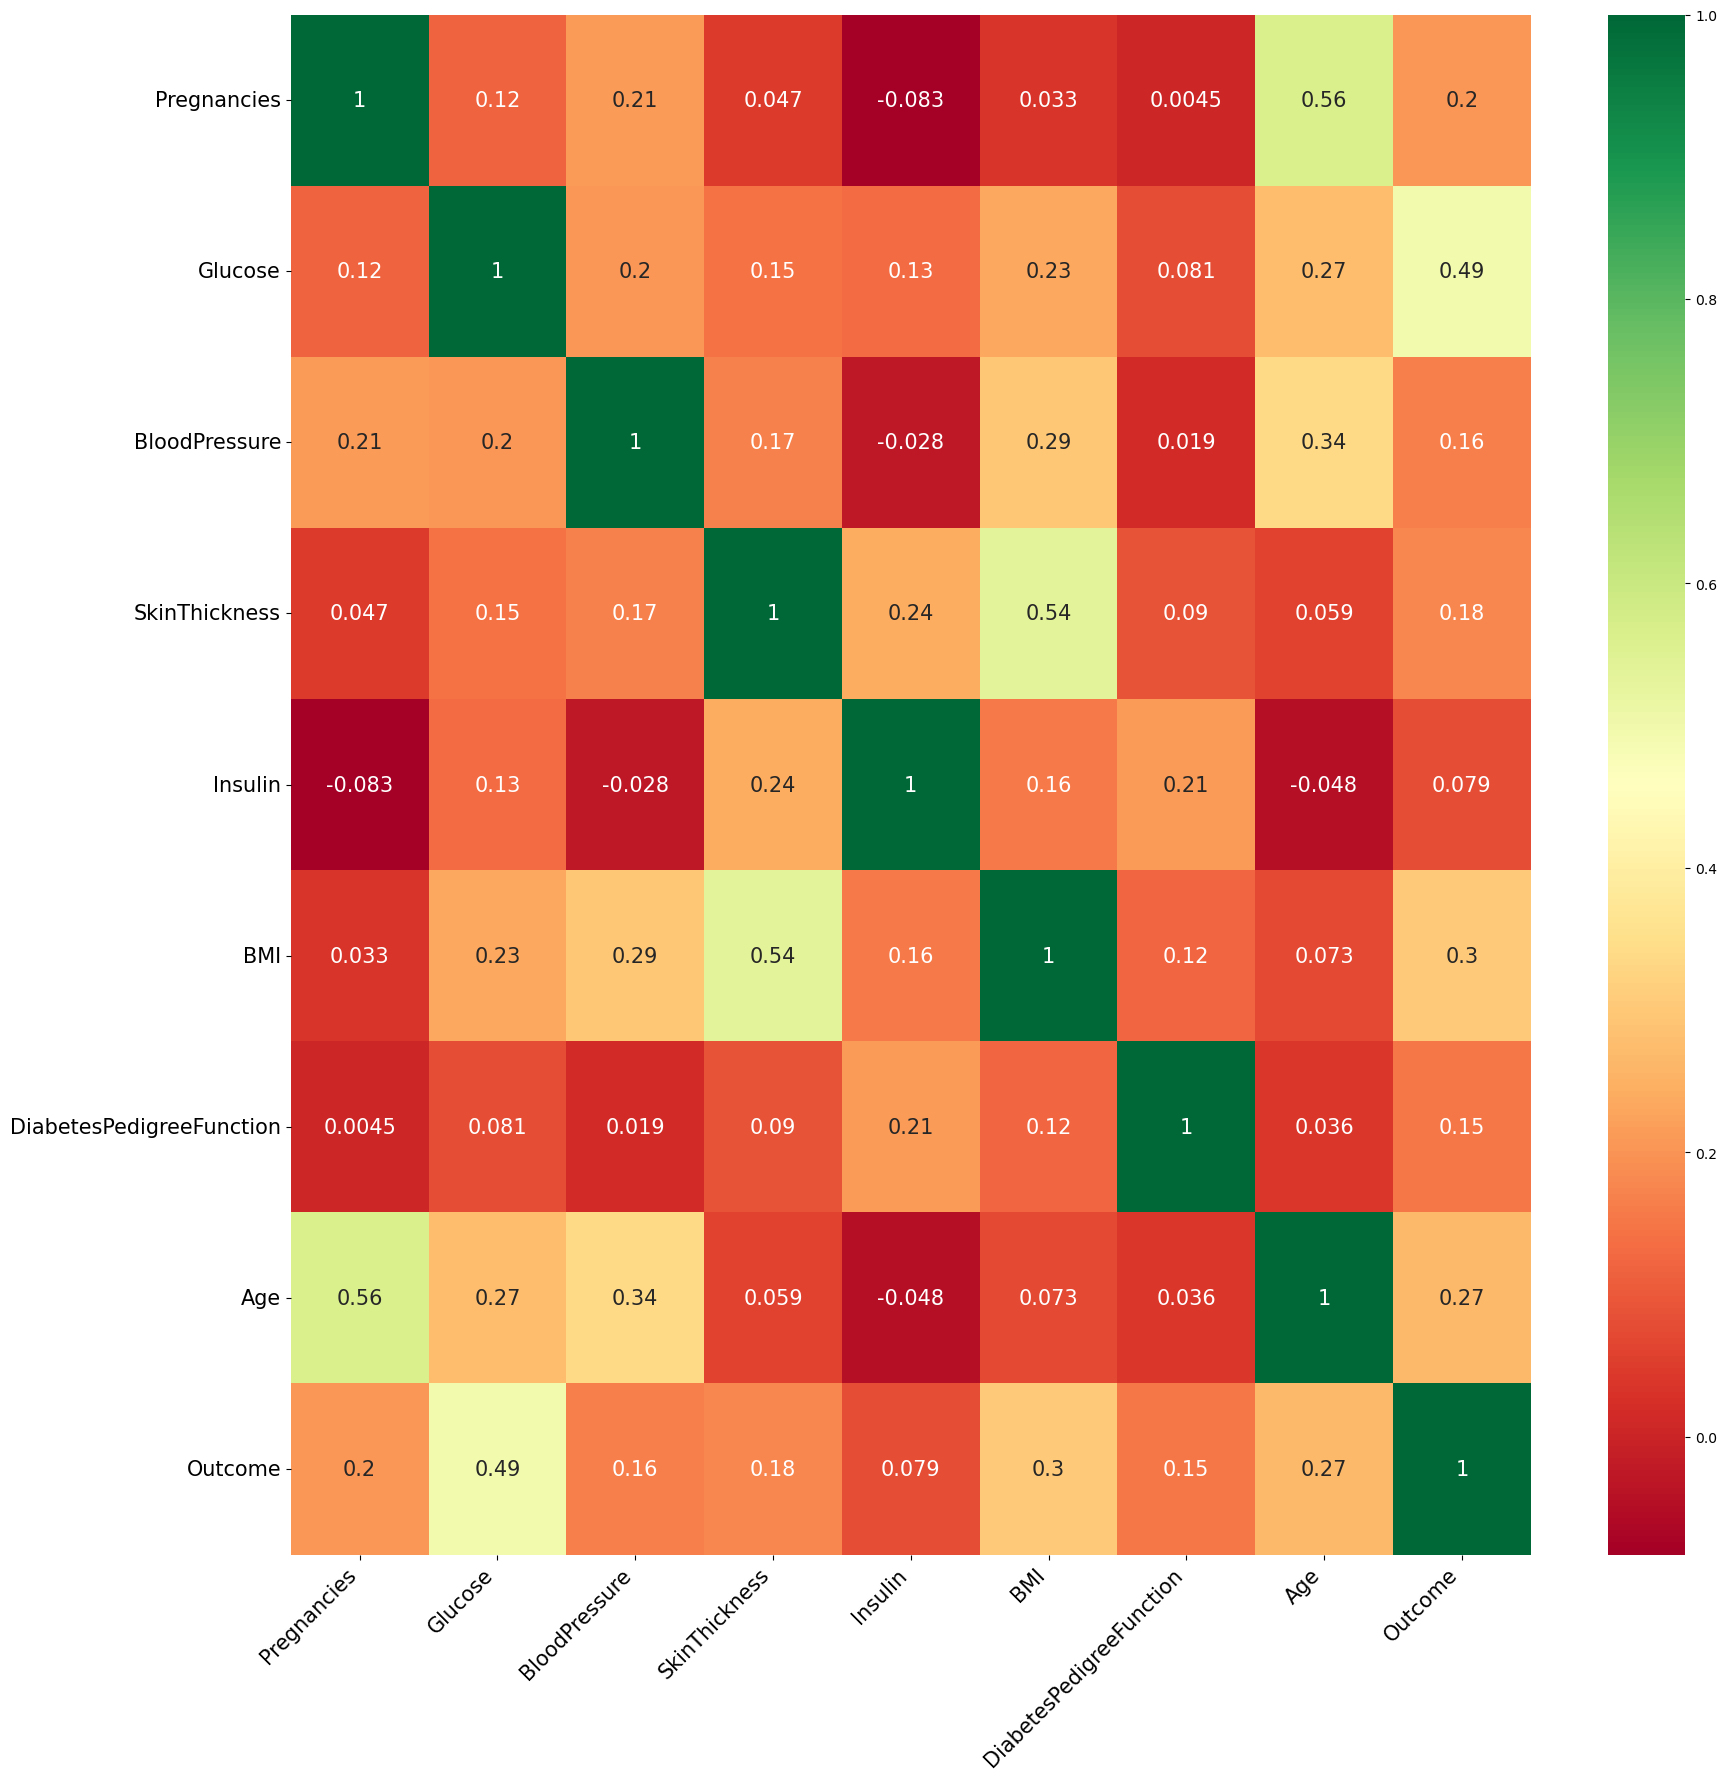

In [67]:
# plotting heat map to check for correlation between independent variables, correlation is done for only continuous data
plt.figure(figsize = (20,20))
heatmap = sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', annot_kws={'size':15})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=15)
plt.show()

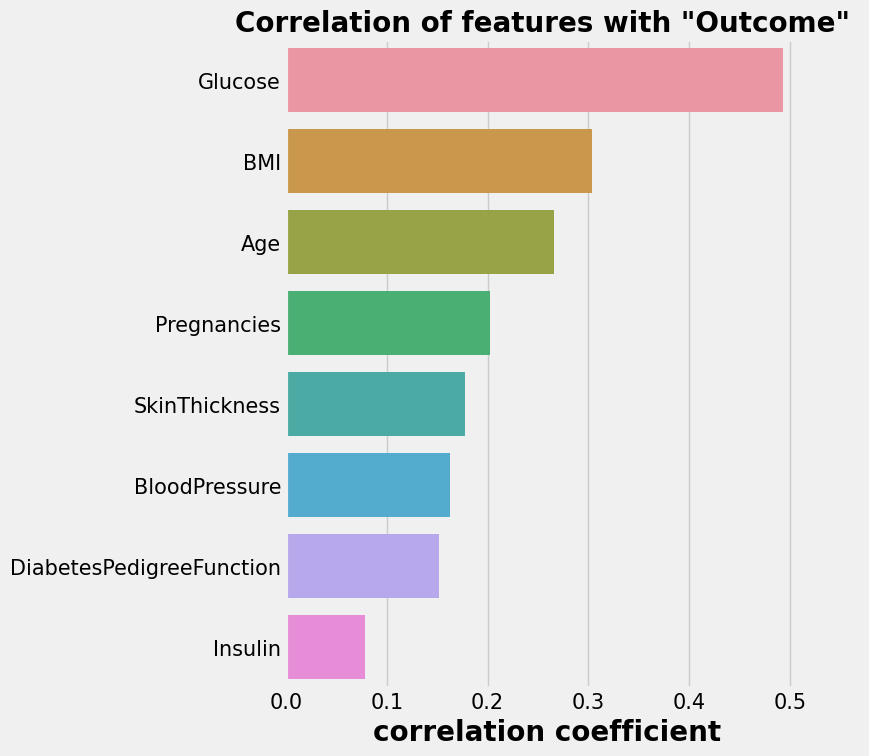

In [74]:
### checking how each independennt feature correlate with the target variable ('Outcome')

plt.figure(figsize = (6,8))
limit=-1

data1 = data.corr()['Outcome'].sort_values(ascending = False)
indices = data1.index
labels = []
corr = []
for i in range(1,len(indices)):
    if data1[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data1[i])
sns.barplot(x = corr,y = labels)
plt.title('Correlation of features with "Outcome" ', fontsize =20, fontweight = 'bold')
plt.xlabel('correlation coefficient', fontsize = 20, fontweight = 'bold')
plt.rcParams['font.size'] = 20
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

The significance of the above plot is to visually represent the correlation between each independent feature (or predictor variable) and the target variable in a dataset. The plot's y-axis represents the different features, while the x-axis represents the correlation coefficient values.

The plot helps in the following ways:

1. Identifying important features: It helps identify which features have a strong linear relationship with the target variable. Features with higher correlation coefficients have a stronger linear relationship with the target variable.

2. Feature selection: It aids in the selection of relevant features for building predictive models. Features with high correlation coefficients are usually more influential in predicting the target variable and may be considered more important in the modeling process.

# 6.  Predictive Model Creation Using Various Classification Algorithms

### 6.1 Independent and dependent variable creation

In [29]:
x = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [76]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.000000,72.000000,35.000000,30.50,33.600000,0.6270,50
1,1,85.000000,66.000000,29.000000,30.50,26.600000,0.3510,31
2,8,183.000000,64.000000,23.000000,30.50,23.300000,0.6720,32
3,1,89.000000,66.000000,23.000000,94.00,28.100000,0.1670,21
4,0,137.000000,40.000000,35.000000,168.00,43.100000,0.3725,33
5,5,116.000000,74.000000,23.000000,30.50,25.600000,0.2010,30
6,3,78.000000,50.000000,32.000000,88.00,31.000000,0.2480,26
7,10,115.000000,69.105469,23.000000,30.50,35.300000,0.1340,29
8,2,197.000000,70.000000,45.000000,31.25,30.500000,0.1580,53
9,8,125.000000,96.000000,23.000000,30.50,31.992578,0.2320,54


In [77]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     1
38     1
39     1
40     0
41     0
42     0
43     1
44     0
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     0
56     1
57     0
58     0
59     0
60     0
61     1
62     0
63     0
64     1
65     0
66     1
67     0
68     0
69     0
70     1
71     0
72     1
73     0
74     0
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    1
110    1
1

### 6.2 Splitting the dataset into training and validation sets

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# shape of train and test data
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (537, 8)
x_test (231, 8)
y_train (537,)
y_test (231,)


### 6.3 Scaling the data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# KNeighbors Classifier Model

In [91]:
# taking optimal k to determine how many nearest neighbors to create

from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
# This code essentially helps in analyzing the performance of the K-Nearest Neighbors algorithm for different
#values of the n_neighbors hyperparameter by calculating the error rate for each value.
# This can be helpful in determining the optimal value of n_neighbors for the given dataset and problem.
# Calculate the error rate by finding the mean of the elements where the predicted values are not equal to the 
# actual values (from y_test) and append it to the error_rate list

In [92]:
print((np.mean(pred_i != y_test)))

0.3116883116883117


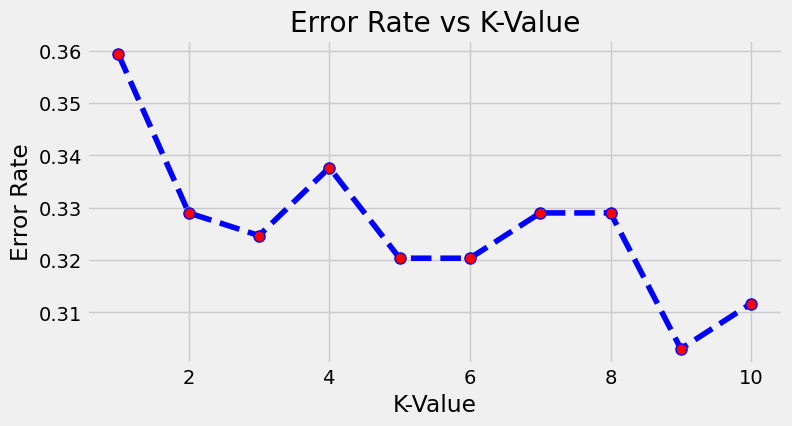

In [93]:
# plot the k-value and error rate

plt.figure(figsize = (8,4))
plt.plot(range(1,11), error_rate, color = 'blue', linestyle = 'dashed',
        marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

**From the graph the error value is reduced when k is 9 so we take the optimal number of neighbors to be 9.**

In [94]:
# creating the KNeighbors Model with the optimal K Value

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train,y_train)
y_predknn = knn.predict(x_test)

###  Evaluating the KNeighbors Classifier model 

In [95]:
# Accuracy score

from sklearn.metrics import accuracy_score, f1_score, classification_report
accuracy = accuracy_score(y_test,y_predknn)
print('Accuracy score for KNeighbors Classifier: ',accuracy)

Accuracy score for KNeighbors Classifier:  0.696969696969697


In [96]:
 # classification report
print('Classification report for KNeighbors Classifier: ', classification_report(y_test,y_predknn))

Classification report for KNeighbors Classifier:                precision    recall  f1-score   support

           0       0.75      0.81      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.69      0.70      0.69       231



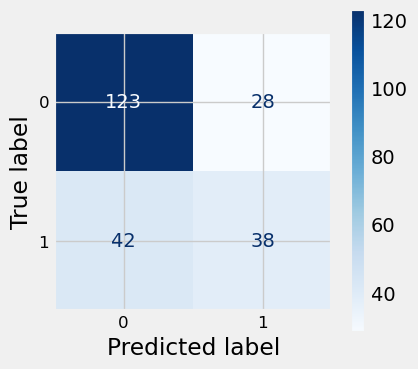

In [97]:
# confusion matrix for the Kneighbors Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# Logistic Regression Model: 

In [98]:
# Building Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# training the model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

# predicting the model
y_predlr = lr_model.predict(x_test)

###  Evaluating the Logistic Regression Model

In [99]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Accuracy score
accuracy = accuracy_score(y_test,y_predlr)
print('Accuracy score for Logistic Regression: ',accuracy)

Accuracy score for Logistic Regression:  0.7359307359307359


In [100]:
# classification report
print('Classification report for Logistic Regression: ', classification_report(y_test,y_predlr))

Classification report for Logistic Regression:                precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



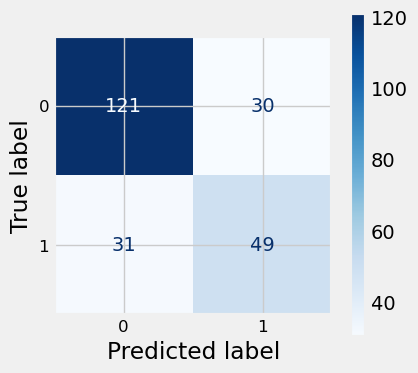

In [101]:
# confusion matrix for the Logistic Regression Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predlr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

#  Support Vector Machine Model

In [102]:
from sklearn.svm import SVC
svc = SVC()

#training the model
svc.fit(x_train,y_train)

# predict the output
y_predsv = svc.predict(x_test)

### Evaluating the Support Vector Classifier model 

In [103]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predsv)
print('Accuracy score for Support Vector Classifier: ',accuracy)

Accuracy score for Support Vector Classifier:  0.7316017316017316


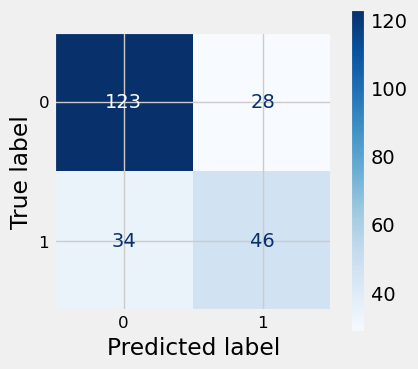

In [104]:
# confusion matrix for the Support Vector Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predsv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

### Hyperparameter Tunning for Support Vector Model

In [105]:
from sklearn.model_selection import GridSearchCV

#defining the parameters

param = {'C': [0.1,1,10,100,1000], 
          'gamma':[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(random_state=42),param,verbose=1,scoring='f1',cv = 3)

# fitting the model for grid search

grid.fit(x_train,y_train)

# print best parameters after tunning

print(grid.best_params_)

# print how our model looks after hyperparameter tunning

print(grid.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'C': 100, 'gamma': 0.01}
SVC(C=100, gamma=0.01, random_state=42)


###  Creating a new model with the new hyperparameters (optimal values)

In [106]:
new_model = SVC(C = 100, gamma = 0.01,random_state = 42)

new_model.fit(x_train,y_train)

new_model_pred = new_model.predict(x_test)


### Evaluating new model

In [107]:
print('Accuracy score:    ',accuracy_score(y_test,new_model_pred))
print('f1 score:          ',f1_score(y_test,new_model_pred))

Accuracy score:     0.7142857142857143
f1 score:           0.5822784810126582


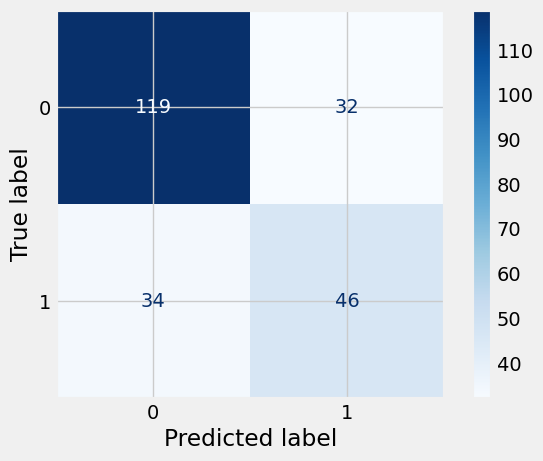

In [108]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,new_model_pred, cmap = plt.cm.Blues, normalize=None, display_labels = ['0','1'])

# Random Forest Classifier Model

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_predrf = rf.predict(x_test)

###  Evaluating the Random Forest Classifier model 

In [110]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predrf)
print('Accuracy score for Random Forest Classifier: ',accuracy)

Accuracy score for Random Forest Classifier:  0.7662337662337663


In [112]:
# Classification report
print('Classification report for Random Forest Classifier: ', classification_report(y_test,y_predrf))

Classification report for Random Forest Classifier:                precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.66      0.68      0.67        80

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



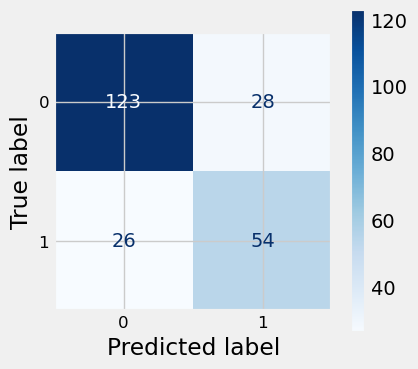

In [113]:
# confusion matrix for the Random Forest Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predrf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

### Hyperparameter Tunning for Random Forest Classifier

* n_estimators = number of trees in the foreset

* max_features =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

* max_depth =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information              about the data

* min_samples_split =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

* min_samples_leaf = minimum number of data points allowed in a leaf node


In [115]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.


#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes that we are going to provide 
#n_iter--->Number of combinations to try
##cv------> number of folds
#verbose=Controls the verbosity:the greater the number, the more detail you will get.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#n_jobs----> if you specify n_jobs to -1, it will use all cores in CPU. If it is set to 1 or 2, it will use one or two cores only 





rf_cv.fit(x_train, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")                  ##printing  best parameters
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100})


###  Creating a new model with the new hyperparameters (optimal values)

In [116]:
#passing best parameter to randomforest
rf_clf1 = RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, 
                                 max_features= 'log2', max_depth= 100)



rf_clf1.fit(x_train, y_train)

y_predict=rf_clf1.predict(x_test)

###  Evaluating the Random Forest Classifier model 

In [117]:
print('F1 score of Random Forest Model: ', f1_score(y_test,y_predict))
print('Accuracy score of Random Forest Model: ', accuracy_score(y_test,y_predict))

F1 score of Random Forest Model:  0.6347305389221558
Accuracy score of Random Forest Model:  0.7359307359307359


In [118]:
print('Classification report of Random Forest Model: ', classification_report(y_test,y_predict))

Classification report of Random Forest Model:                precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.61      0.66      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



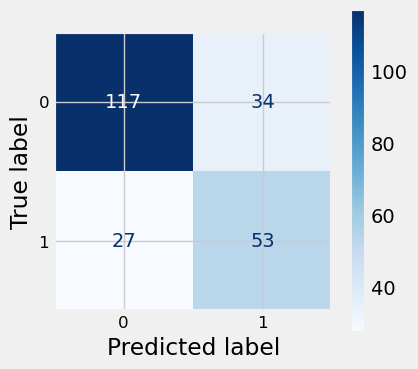

In [119]:
# confusion matrix for the Random Forest Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

**I utilized KNeighbors Classifier, Logistic Regression, Support Vector Machine, and Random Forest Classifier models on the dataset, achieving commendable performance with a high accuracy score. Next, I plan to address dataset imbalance to explore potential improvements in performance.**

# Balancing the dataset

Balancing a dataset in machine learning is often done to address the issue of class imbalance. Class imbalance occurs when the classes in the dataset are not represented equally, with one or more classes having significantly fewer samples compared to others. This can lead to biased models that perform poorly on the underrepresented classes. Balancing the dataset can help improve the performance of machine learning algorithms in such scenarios. 

Here are some reasons why balancing a dataset is advisable for certain machine learning algorithms:

1. **Preventing Bias**: Imbalanced datasets can cause the model to be biased towards the majority class, leading to poor generalization and predictive performance for the minority class.

2. **Improved Learning**: Balancing the dataset allows the model to learn from a more representative sample of the data, ensuring that it captures patterns from all classes equally.

3. **Enhanced Performance Metrics**: Balancing the dataset can lead to better performance metrics, such as accuracy, precision, recall, and F1-score, especially for the minority class.

4. **Better Decision Boundaries**: Balancing the dataset can help the algorithm in creating decision boundaries that are more inclusive of all classes, resulting in a more robust and accurate model.

However, it's crucial to note that balancing a dataset is not always necessary or beneficial. In some cases, the class imbalance might reflect the real-world scenario, and artificially balancing the data might lead to overfitting or loss of important information. It's important to carefully assess the nature of the problem, the specific algorithm being used, and the goals of the analysis before deciding whether to balance the dataset.

In [33]:
# checking to see if the data is balanced
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- the data is not balanced

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [35]:
from collections import Counter
print('Actual Classes: ',Counter(y_train))
print('SMOTE Classes: ', Counter(y_smote))

Actual Classes:  Counter({0: 349, 1: 188})
SMOTE Classes:  Counter({0: 349, 1: 349})


# Building the models using the balanced dataset

# KNeighbors Classifier Model using balanced dataset

In [43]:
# taking optimal k to determine how many nearest neighbors to create

from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,11):
    knn_b = KNeighborsClassifier(n_neighbors = i)
    knn_b.fit(x_smote,y_smote)
    pred_i = knn_b.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
# This code essentially helps in analyzing the performance of the K-Nearest Neighbors algorithm for different
#values of the n_neighbors hyperparameter by calculating the error rate for each value.
# This can be helpful in determining the optimal value of n_neighbors for the given dataset and problem.
# Calculate the error rate by finding the mean of the elements where the predicted values are not equal to the 
# actual values (from y_test) and append it to the error_rate list

In [44]:
print((np.mean(pred_i != y_test)))

0.3116883116883117


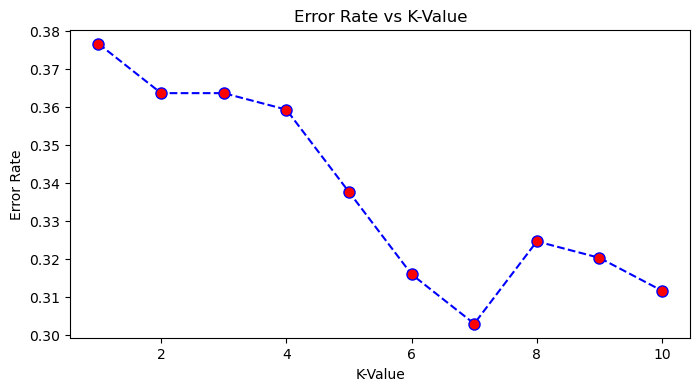

In [45]:
# plot the k-value and error rate

plt.figure(figsize = (8,4))
plt.plot(range(1,11), error_rate, color = 'blue', linestyle = 'dashed',
        marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

**From the graph the error value is reduced when k is 7 so we take the optimal number of neighbors to be 9.**

In [46]:
# creating the KNeighbors Model with the optimal K Value

knn_b = KNeighborsClassifier(n_neighbors = 7)
knn_b.fit(x_smote,y_smote)
y_predknn_b = knn_b.predict(x_test)

###  Evaluating the KNeighbors Classifier model 

In [48]:
# Accuracy score

from sklearn.metrics import accuracy_score, f1_score, classification_report
accuracy = accuracy_score(y_test,y_predknn_b)
print('Accuracy score for KNeighbors Classifier using balanced data: ',accuracy)

Accuracy score for KNeighbors Classifier using balanced data:  0.696969696969697


In [49]:
 # classification report
print('Classification report for KNeighbors Classifier using balanced: ', classification_report(y_test,y_predknn_b))

Classification report for KNeighbors Classifier using balanced:                precision    recall  f1-score   support

           0       0.85      0.66      0.74       151
           1       0.54      0.78      0.64        80

    accuracy                           0.70       231
   macro avg       0.70      0.72      0.69       231
weighted avg       0.74      0.70      0.70       231



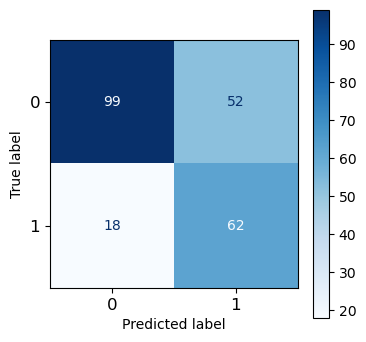

In [50]:
# confusion matrix for the Kneighbors Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predknn_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# Logistic Regression Model using balanced dataset: 

In [51]:
# Building Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# training the model
lr = LogisticRegression()
lr.fit(x_smote,y_smote)

# predicting the model
y_predlrb = lr.predict(x_test)

###  Evaluating the Logistic Regression Model

In [53]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Accuracy score
accuracy = accuracy_score(y_test,y_predlrb)
print('Accuracy score for Logistic Regression using balanced dataset: ',accuracy)

Accuracy score for Logistic Regression using balanced dataset:  0.7056277056277056


In [54]:
# classification report
print('Classification report for Logistic Regression using balanced dataset: ', classification_report(y_test,y_predlrb))

Classification report for Logistic Regression using balanced dataset:                precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



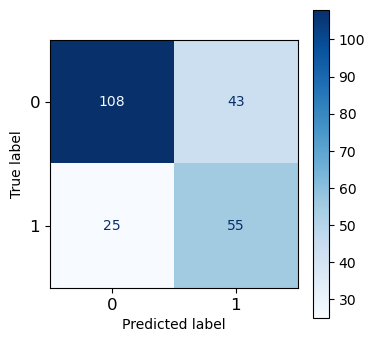

In [55]:
# confusion matrix for the Logistic Regression Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predlrb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

#  Support Vector Machine Model using balanced dataset

In [58]:
from sklearn.svm import SVC
sv = SVC(C = 100, gamma = 0.01,random_state = 42)

sv.fit(x_smote,y_smote)

y_predsvc = sv.predict(x_test)


### Evaluating the Support Vector Classifier model 

In [59]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predsvc)
print('Accuracy score for Support Vector Classifier using balanced dataset: ',accuracy)

Accuracy score for Support Vector Classifier using balanced dataset:  0.6926406926406926


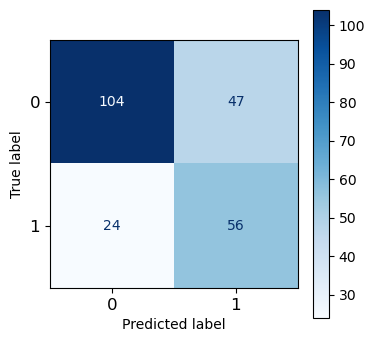

In [60]:
# confusion matrix for the Support Vector Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predsvc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# Conclusion

The goal of the study was to develop a predictive model to predict whether a person will have diabetes or not based on the given features
Exploratory data analysis, preprocessing, model creation, training, testing, and performance evaluation were among the processes that made up its framework.

1. **Data Inspection:**
   - I began by conducting an initial review of the data, revealing that our dataset contained 9 columns, and 769 rows
   
2. **Data Quality Assessment:**
   - I meticulously assessed the dataset for missing values to ensure data integrity and completeness.

3. **Exploratory Data Analysis (EDA):**
   - I conducted EDA, encompassing both univariate and bivariate analyses.
   - Employing SweetViz, I generated insightful visualizations that provided a deeper understanding of the dataset.

4. **Data Transformation:**
   - In the process of readying the data for classification, I corrected certain data points within Glucose, BloodPressure, SkinThickness, Insulin, and BMI that were inaccurately recorded as zero. This was rectified by replacing these zero values with either the mean or median, depending on the distribution.   
    - Moreover, I addressed outliers in the dataset, recognizing that outliers can considerably distort key statistical measures of central tendency (mean, median) and dispersion (standard deviation, variance). By imputing outliers, I aimed to obtain more precise and representative summary statistics, thereby safeguarding the integrity of the data.
5. **Model Building and Accuracy Assessment:**
   - I employed a diverse set of classification models, including Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine, to classify classify whether a patient will have diabetes or not. Each model was evaluated for accuracy.
  
    - accuracy score were used to evaluate the models, and the Random Forest Classifier showed the highest score of 76.6%. 
    - I next tried to use Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class in an effort to balance the dataset, however this adjustment did not enhance the accuracy score. 
    - As a result, I switched back to our best-performing model, the Random Forest Classifier, using the unbalanced dataset. 
    - I further conducted hyperparameters tuning on the Random Forest model, but I didn't notice any appreciable improvement in performance. 
    - My final model remains the Random Forest Classifier with accuracy score of 76.6%. 

   
**By following these steps, and utilizing a range of classification models, I gained insights, optimized the data for modeling, and rigorously evaluated the models' effectiveness in predicting whether a person will have diabetes or not. My final model remains the Random Forest Classifier with accuracy score of 76.6%.** 